In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import joblib

In [72]:
df = pd.read_csv('train.csv')

In [73]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [74]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [75]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [76]:
for column in df.columns:
    print(f"{column}: {df[column].dtype}")

PassengerId: int64
Survived: int64
Pclass: int64
Name: object
Sex: object
Age: float64
SibSp: int64
Parch: int64
Ticket: object
Fare: float64
Cabin: object
Embarked: object


In [77]:
df.fillna({
    'Age': df['Age'].median(),             # Median for numerical columns
    'Cabin': df['Cabin'].mode()[0],
    'Embarked': df['Embarked'].mode()[0]   # Mode for categorical columns
}, inplace=True)

In [78]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [79]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [80]:
numerical_col = ['PassengerId','Survived','Age','Pclass','SibSp','Parch','Fare']
df_n = df[numerical_col]

In [81]:
df.shape

(891, 12)

In [82]:
df_n.shape

(891, 7)

In [83]:
df_n

,PassengerId,Survived,Age,Pclass,SibSp,Parch,Fare
0,1,0,22.0,3,1,0,7.2500
1,2,1,38.0,1,1,0,71.2833
2,3,1,26.0,3,0,0,7.9250
3,4,1,35.0,1,1,0,53.1000
4,5,0,35.0,3,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,27.0,2,0,0,13.0000
887,888,1,19.0,1,0,0,30.0000
888,889,0,28.0,3,1,2,23.4500
889,890,1,26.0,1,0,0,30.0000


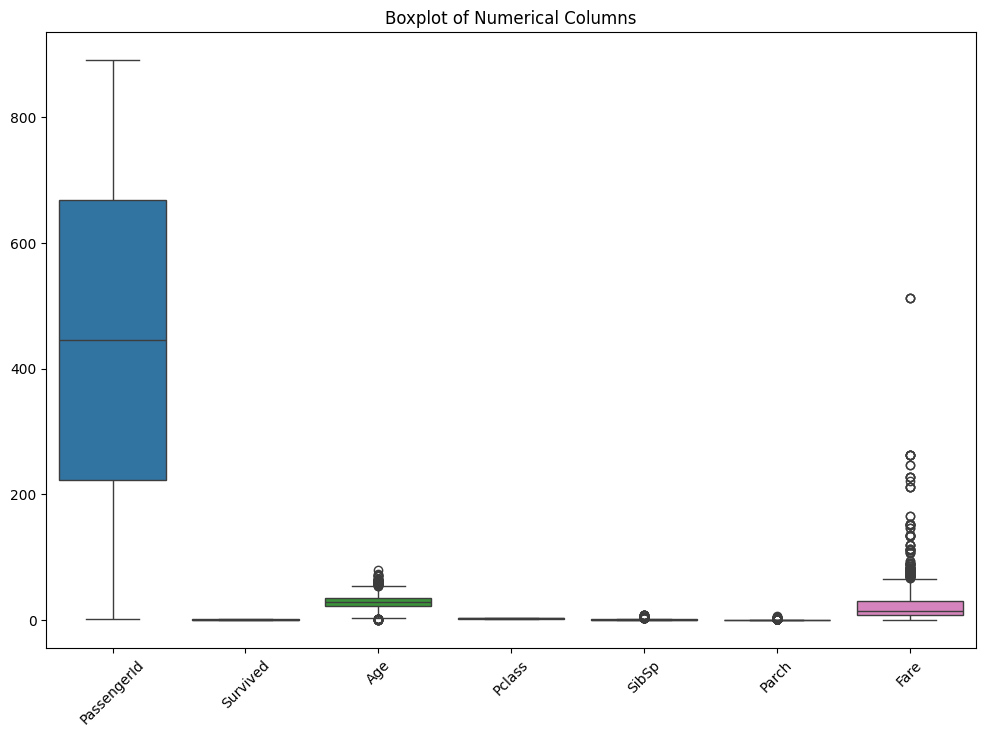

In [84]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_n)
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Columns')
plt.show()

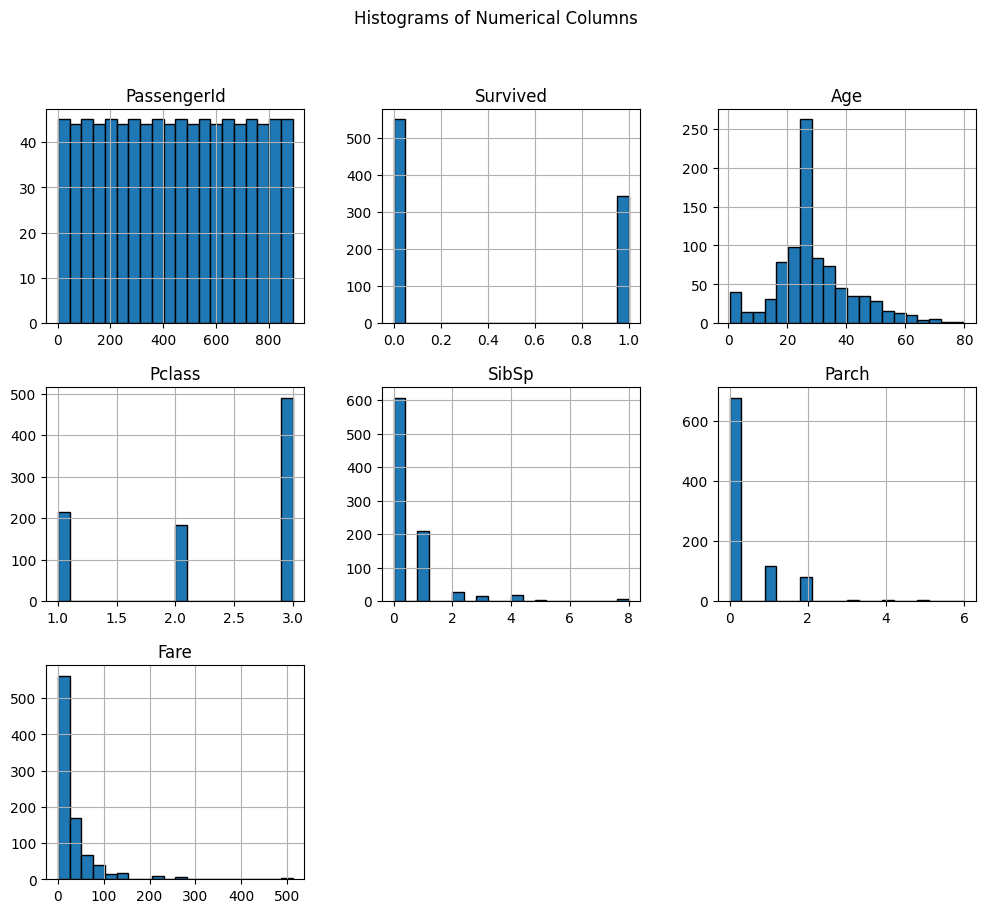

In [85]:
df_n.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numerical Columns')
plt.show()

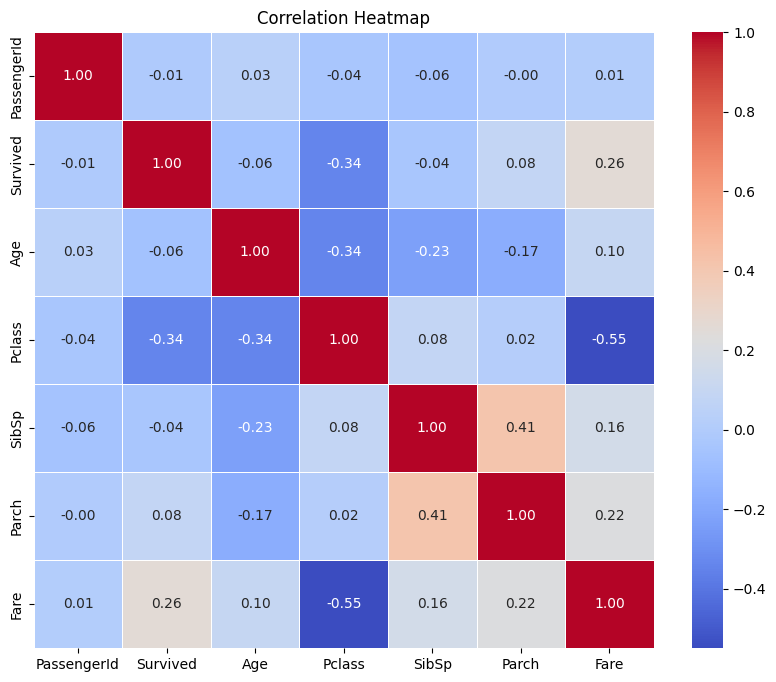

In [86]:
# Compute correlation matrix
corr = df_n.corr()

# Heatmap for correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

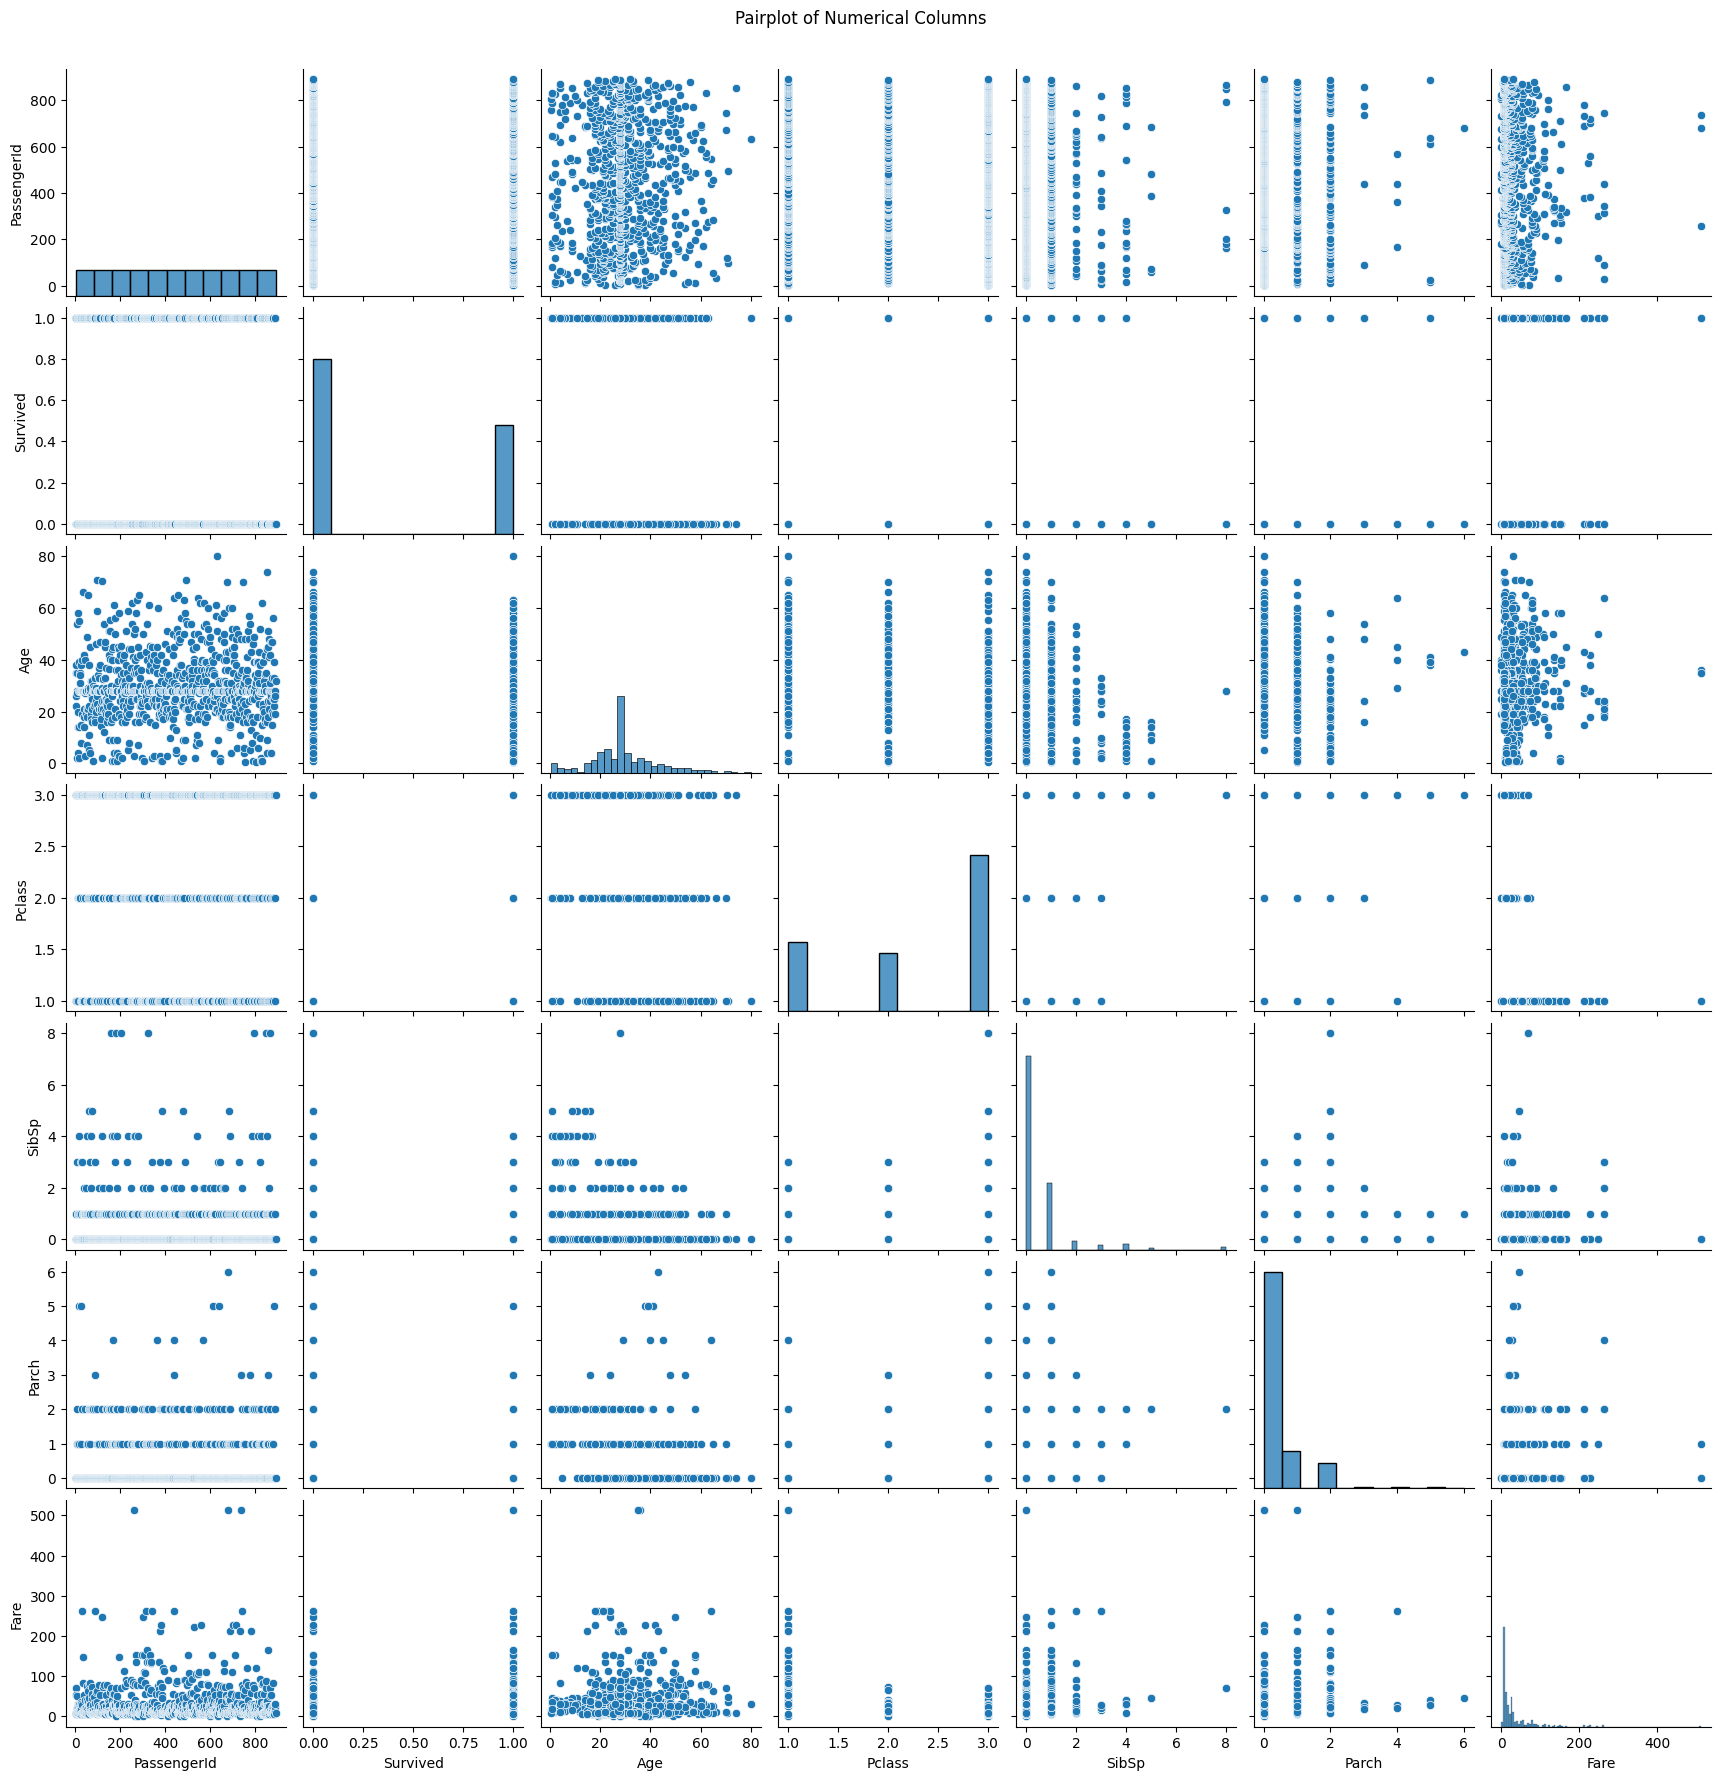

In [87]:
# Pairplot for numerical columns
sns.pairplot(df_n)
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()

In [90]:
df_n.columns

Index(['PassengerId', 'Survived', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [91]:
y = df_n['Survived']


In [93]:
X = df_n.drop(columns=['Survived'])

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [110]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [100]:
y_pred = rf.predict(X_test)

In [102]:
mse = mean_squared_error(y_test, y_pred)

In [106]:
mae = mean_absolute_error(y_test, y_pred)

In [103]:
r2 = r2_score(y_test, y_pred)

In [129]:
print(f'Random Forest Regressor - MSE is:{mse}, MAE is:{mae} and r2_score is:{r2}')

Random Forest Regressor - MSE is:0.17798044692737433, MAE is:0.3424022346368715 and r2_score is:0.26606544401544396


In [112]:
xb_ = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [113]:
xb_.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [114]:
y_pred_ = xb_.predict(X_test)

In [115]:
mse_ ,r2_, mae_ = mean_squared_error(y_test,y_pred_), r2_score(y_test,y_pred_), mean_absolute_error(y_test,y_pred_)

In [130]:
print(f'XBBoost Regressor - MSE is:{mse_}, MAE is:{mae_} and r2_score is:{r2_}')

XBBoost Regressor - MSE is:0.17037255566311912, MAE is:0.3584700468355301 and r2_score is:0.297437959330502


In [132]:
joblib.dump(xb_, 'xgboost_model.pkl')

['xgboost_model.pkl']

In [121]:
param_dist = {
    'n_estimators': randint(50, 100),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 7),
    'subsample': uniform(0.8, 0.2),
    'colsample_bytree': uniform(0.8, 0.2)
}

In [124]:
# Initialize the XGBRegressor
xgb = XGBRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=100,  # Reduce n_iter for a quicker run
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=42,
    error_score='raise'
)

In [125]:
# Fit the RandomizedSearchCV to the data
try:
    random_search.fit(X_train, y_train)
except Exception as e:
    print(f"Error during fitting: {e}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [126]:
# Print the best parameters and the best R2 score
print("Best Parameters:", random_search.best_params_)
print("Best R2 Score:", random_search.best_score_)


Best Parameters: {'colsample_bytree': 0.801839410323326, 'learning_rate': 0.030294308573206426, 'max_depth': 5, 'n_estimators': 74, 'subsample': 0.8010123167692438}
Best R2 Score: 0.1722051901363323


In [127]:
# Use the best estimator to make predictions
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)

In [128]:
# Evaluate the best model
best_mse = mean_squared_error(y_test, y_pred)
best_r2 = r2_score(y_test, y_pred)
best_mae = mean_absolute_error(y_test, y_pred)

print(f'Hypertuning Params - MSE:{best_mse}, r2_Score:{best_r2}, MAE:{best_mae}')

Hypertuning Params - MSE:0.1806106165616245, r2_Score:0.25521946393165884, MAE:0.38626902180011047
